In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from IPython.display import Math
from sympy import Symbol, diff, lambdify, Float, latex
from sympy.solvers import solve


##Funciones

In [ ]:
#obtiene las raices cuadraticas de la manera clasica
def cuadratic_clasic(a=1,b=1,c=1):
    s=[]
    
    if ((b**2-4*a*c))<0:
      #se crea de forma compleja despejando del deiscriminate i "sqrt(-1)"
      s.append(complex(-b/(2*a),math.sqrt(-(b**2-4*a*c))/(2*a)))
      s.append(complex(-b/(2*a),-math.sqrt(-(b**2-4*a*c))/(2*a)))
    else:
      s.append((-b+math.sqrt(b**2-4*a*c))/(2*a))
      s.append((-b-math.sqrt(b**2-4*a*c))/(2*a))
    return s

def cuadratic_Po(b=1,c=1):
    s=[]
    
    #se crea de forma compleja despejando del deiscriminate i "sqrt(-1)"
    if ((b**2)/4-c)<0:
      s.append(complex(-b/(2),math.sqrt(-((b**2)/4-c))))
      s.append(complex(-b/(2),-math.sqrt(-((b**2)/4-c))))
    else:
      s.append((-b/2+math.sqrt((b**2)/4-c)))
      s.append((-b/2-math.sqrt((b**2)/4-c)))
    return s

def graf_cuac(a,b,c,titulo):
  display(Math(titulo))
  z=cuadratic_clasic(a=a,b=b,c=c)
  if (type(z[0])!=complex):
    ax=plt.subplot()
    x=np.linspace(z[0]+5,z[1]-5,30)
    y=np.power(a*x,2)+b*x+c
    ax.plot(x,y)
    ax.scatter(z,[0,0],s=50,color='r')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(True, which='both')
    plt.title('$'+titulo+'$')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

  display(Math("x_1={}".format(z[0])))
  display(Math("x_2={}".format(z[1])))

In [ ]:
z=Symbol('z')
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256,f=(z**2)):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.zeros((height, width, 3),dtype=np.uint32)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    # encuentra las raices con el metodo de solve de sympy
    r=solve(f,z)
    colores=['Rojo','Verde','Azul']
    for i in range(len(r)):
      r[i] = complex(r[i])
      print('el area {1} converge a la raiz de: {0}'.format(r[i],colores[i]))
    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 15
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158
    df=lambdify(z,diff(f,z)) #deriva la funcion f y la combierte en una funcion de python
    f1=lambdify(z,f) # comvierte la funcion f de tipo simbolico en una funcion de python
    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z1 = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z1)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z1 - m*f1(z1)/ dz # Newton iteration

                    if abs(znext - z1) < eps: # stop when close enough to any root
                        break
                    
                    z1 = znext
                
                # Pixels colored using the roots
                for t,root in enumerate(r):
                  if abs(z1-root)<eps:
                    color = 255-count*multcol
                    pixels[height-y-1,x,t] = color if color>0 else 0
                    
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256,f=(z**2)):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter,f=f)
    plt.title('Newton Fractal $'+latex(f)+'$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

In [ ]:
def plot_iterac(z1,f):
  r=[]
  i=[]
  z0=z1
  df=lambdify(z,diff(f,z))
  f1=lambdify(z,f)
  for k in range(200):
    dz = df(z1)
    if dz == 0:
      print('no se puede dividir por cero')
      break
    z1 = z1 - f1(z1) / dz # Newton iteration
    r.append(np.real(z1))
    i.append(np.imag(z1))
  fig,ax=plt.subplots(2, 1, constrained_layout=True)
  ax[0].plot(r)
  ax[0].set_ylabel('Real part')
  ax[0].grid(True, which='both')
  fig.suptitle('$z_0={0}$'.format(z0))


  ax[1].plot(i)
  ax[1].set_ylabel('Imaginary part')
  ax[1].grid(True, which='both')
  plt.show()

## Cuadratic

In [ ]:
#x^2
graf_cuac(1,0,0,'f(x)=x^2')
#(x-1)^2
graf_cuac(1,-2,1,'f(x)=(x-1)^2')
#x^2 – 1
graf_cuac(1,0,-1,'f(x)=(x-1)^2-1')
#x^2+ 1
graf_cuac(1,0,1,'f(x)=(x-1)^2-1')

<IPython.core.display.Math object>

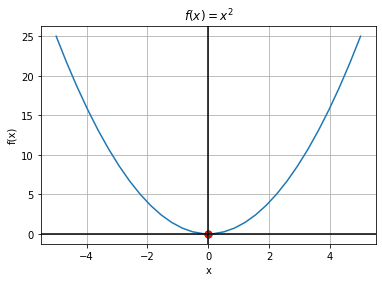

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Z region from ( -50.0 , -50.0 ) to ( 50.0 , 50.0 )
el area Rojo converge a la raiz de: 0j


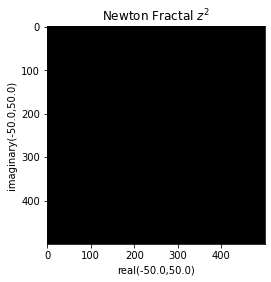

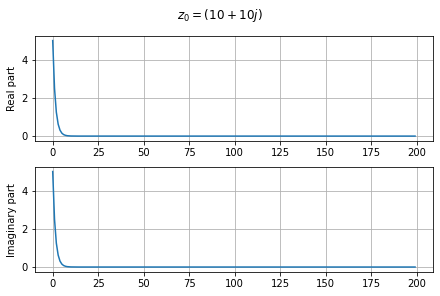

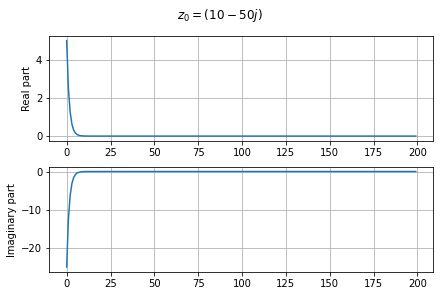

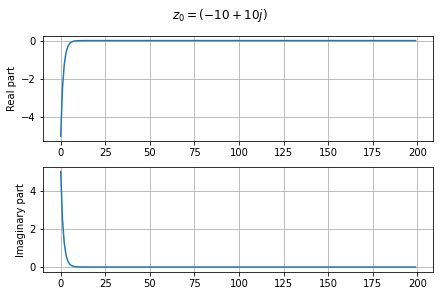

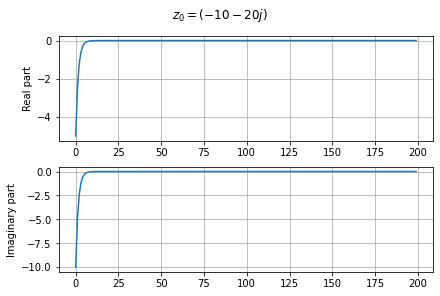

no se puede dividir por cero


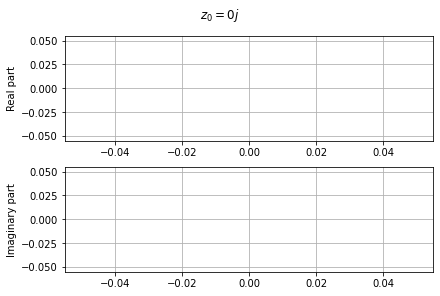

In [ ]:
#x^2
graf_cuac(1,0,0,'f(x)=x^2')
f=z**2
display1(zoom=100,f=f)
plot_iterac(complex(10,10),f)
plot_iterac(complex(10,-50),f)
plot_iterac(complex(-10,10),f)
plot_iterac(complex(-10,-20),f)
plot_iterac(complex(0,0),f)

Como se observa en la primera grafica la raiz es una raiz de mutipicidad 2 igual a cero, y en la primera deriada en dicho punto era $\frac{df}{dx}=0$, por lo tanto no se puede evalur e polinomio en dicho punto y como se program la funcion esta no asegura una raiz certera para la ecuacion planteada, por esta razon el fractal no se puede dibujar y se muestra como en negro, para las graficas de las teracion muestra como esta a tener un punto inicial distinto de $0+0i$, los valore van disminullendo tanto para el eje complejo como el eje real hasta determina la convergencia en $0+0i$. 

<IPython.core.display.Math object>

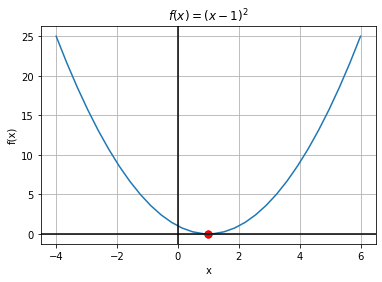

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Z region from ( -50.0 , -50.0 ) to ( 50.0 , 50.0 )
el area Rojo converge a la raiz de: (1+0j)


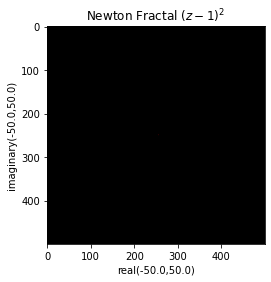

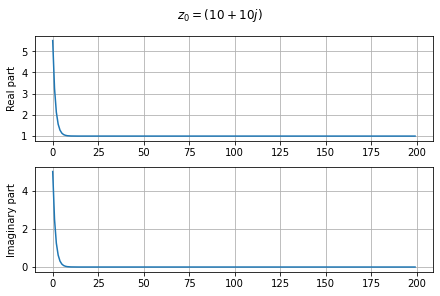

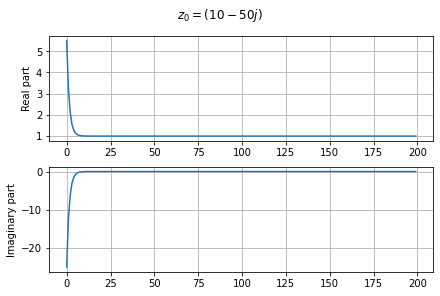

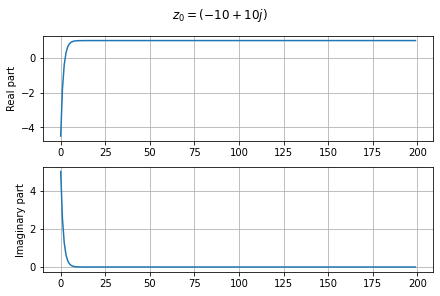

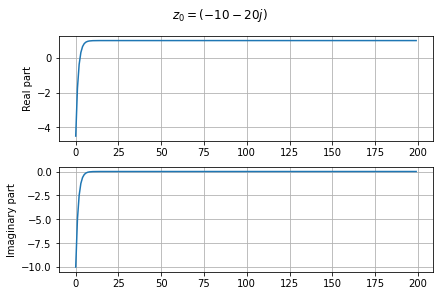

no se puede dividir por cero


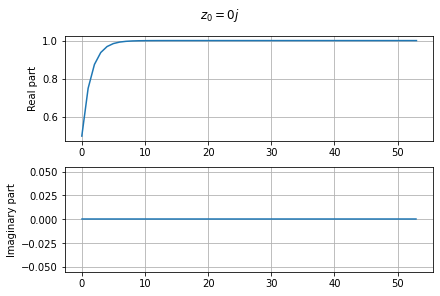

In [ ]:
#(x-1)^2
graf_cuac(1,-2,1,'f(x)=(x-1)^2')
f=(z-1)**2
display1(zoom=100,f=f)
plot_iterac(complex(10,10),f)
plot_iterac(complex(10,-50),f)
plot_iterac(complex(-10,10),f)
plot_iterac(complex(-10,-20),f)
plot_iterac(complex(0,0),f)

De igual manera que el anterior, esta tiene una multiplicidad de 2 dando como raíz x=1, como la derivada en ese punto no es posible evaluarla el método no garantiza una convergencia lo cual en el fractal no se dibuja como tal, a diferencia de la anterior en el punto z0=0+0i, la gráfica de iteración puesta que esta solo se mueve en el plano real ya que la que busca aproximarse a 1. 

<IPython.core.display.Math object>

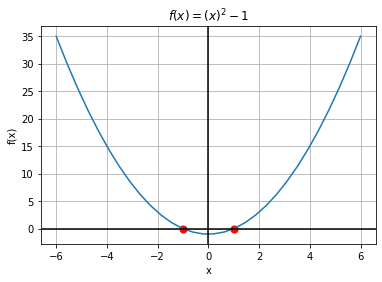

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Z region from ( -50.0 , -50.0 ) to ( 50.0 , 50.0 )
el area Rojo converge a la raiz de: (-1+0j)
el area Verde converge a la raiz de: (1+0j)


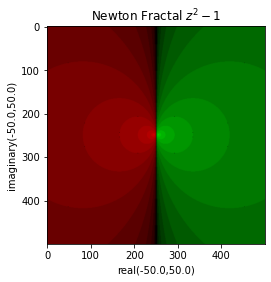

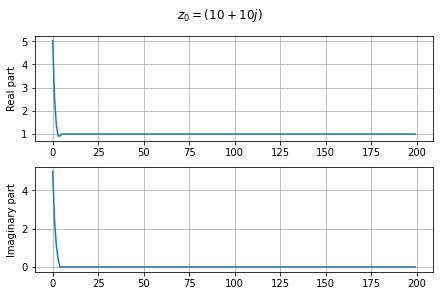

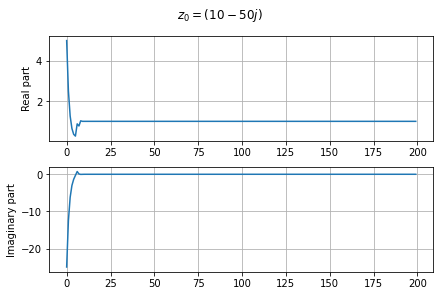

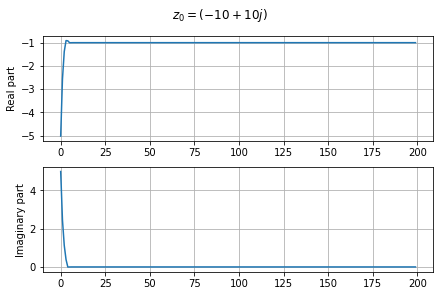

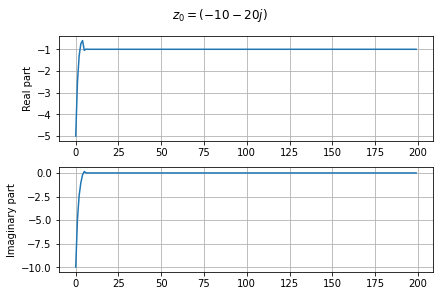

no se puede dividir por cero


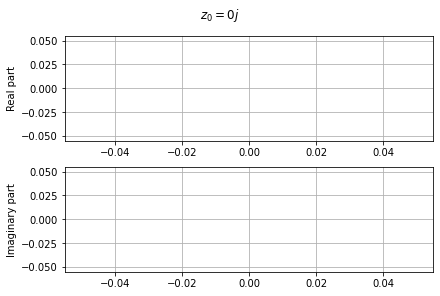

In [ ]:
#(x)^2-1
graf_cuac(1,0,-1,'f(x)=(x)^2-1')
f=(z)**2-1
display1(zoom=100,f=f)
plot_iterac(complex(10,10),f)
plot_iterac(complex(10,-50),f)
plot_iterac(complex(-10,10),f)
plot_iterac(complex(-10,-20),f)
plot_iterac(complex(0,0),f)

En esta funcion las raices son $x_1=1$ y $x_2=-1$, pero al igual que la primera al tener un minimo local en $(0,0)$, esta no se pude evaluar con un $z_0=0+0i$, por lo que la iteracion no se puede evaluar, pero en el fractar al tener dos raices distintas se generan dos areas, donde se muestra que en la fronteras de estas dos areas el numero de iteracion es mayor ya que el degradado tiene a ser oscuro, por lo que se supone que el valor de convergencia debe estar saltnando entre la aproximacion de las dos raíces.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Z region from ( -50.0 , -50.0 ) to ( 50.0 , 50.0 )
el area Rojo converge a la raiz de: -1j
el area Verde converge a la raiz de: 1j


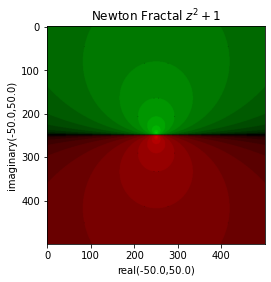

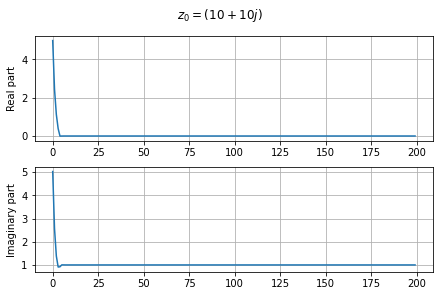

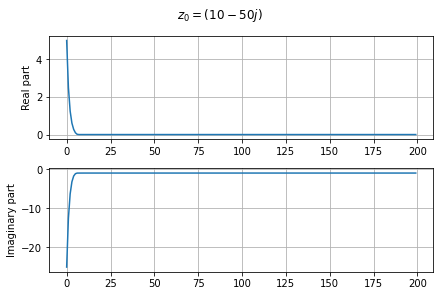

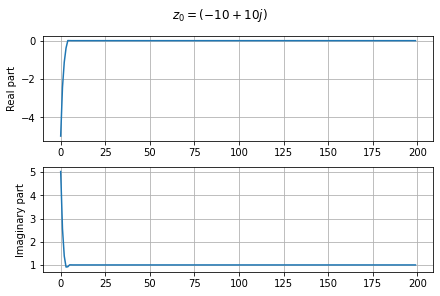

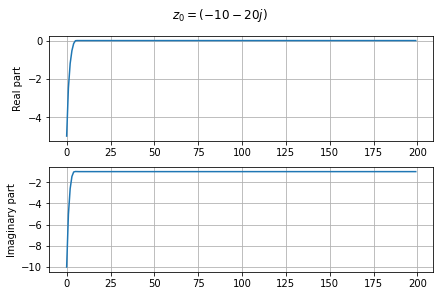

no se puede dividir por cero


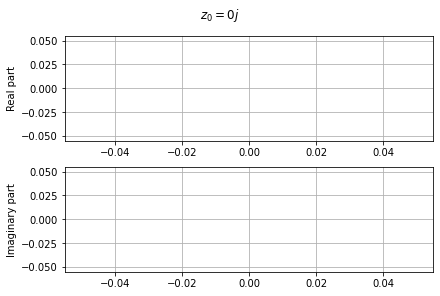

In [ ]:
#(x)^2+1
graf_cuac(1,0,1,'f(x)=(x)^2+1')
f=(z)**2+1
display1(zoom=100,f=f)
plot_iterac(complex(10,10),f)
plot_iterac(complex(10,-50),f)
plot_iterac(complex(-10,10),f)
plot_iterac(complex(-10,-20),f)
plot_iterac(complex(0,0),f)

Como las raices de esta funcion son raices complejas estas raice no se puede mostrar como graficas en un plano real, pero a diferencia de la funcion anterior en el fractal de Newton, las areas se giran $90^o$ en sentido antihorario, ya las raice son complejas por lo que estas se encuenra en el eje vertical.